In [1]:
import pandas as pd

In [12]:
data = pd.read_csv('C:\\Users\\biola\\Downloads\\Cars.csv')


In [14]:
data.describe()


,Age,KM,HP,CC,Doors,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,1615.00000,32500.000000


In [16]:
import seaborn as sns


In [18]:
import matplotlib.pyplot as plt

In [24]:
corr_matrix = data.corr()


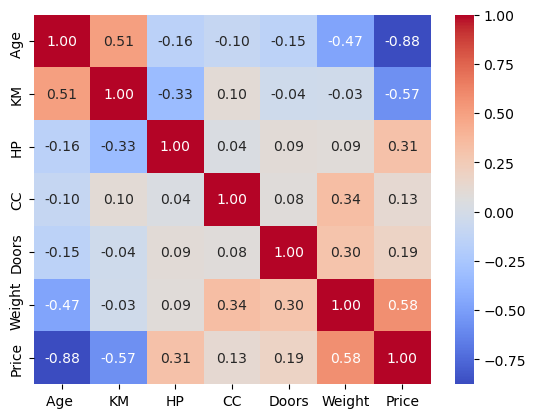

In [22]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = data.drop('Price', axis=1)
y = data['Price']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
coefficients = regressor.coef_
intercept = regressor.intercept_

In [44]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2230.4089564   -754.13414188   438.37760989   -43.2775685
   -21.27526701  1063.32680788]
Intercept: 10744.041961645013


In [46]:
equation = f"Price = {intercept:.2f} + "
for i, col in enumerate(X.columns):
    equation += f"{coefficients[i]:.2f}*{col} + "

In [48]:
equation = equation.rstrip(" +") 


In [50]:
print("Linear Regression Equation:", equation)

Linear Regression Equation: Price = 10744.04 + -2230.41*Age  + -754.13*KM + 438.38*HP + -43.28*CC + -21.28*Doors + 1063.33*Weight


In [52]:
from sklearn.metrics import mean_squared_error


In [54]:
y_pred = regressor.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)

In [58]:
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1993231.29
